In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### 计算最终的在随机状态下的近邻数

In [2]:
data_all=pd.read_csv('D:/COSMOS 2015 cataloge/003/运行结果/data_all_marked')
stastic=pd.read_csv('D:/COSMOS 2015 cataloge/003/stastic.csv')
stastic_random=pd.read_csv('D:/COSMOS 2015 cataloge/003/stastic_random.csv')
stastic_random_2=pd.read_csv('D:/COSMOS 2015 cataloge/003/stastic_random_2.csv')
stastic_random_3=pd.read_csv('D:/COSMOS 2015 cataloge/003/stastic_random_3.csv')
stastic_random_4=pd.read_csv('D:/COSMOS 2015 cataloge/003/stastic_random_4.csv')
stastic_random_5=pd.read_csv('D:/COSMOS 2015 cataloge/003/stastic_random_5.csv')

# 不知为何，额外出现了名为'Unnamed'的列，去之
stastic.drop(['Unnamed: 0'],axis=1,inplace=True)
stastic_random.drop(['Unnamed: 0'],axis=1,inplace=True)
stastic_random_2.drop(['Unnamed: 0'],axis=1,inplace=True)
stastic_random_3.drop(['Unnamed: 0'],axis=1,inplace=True)
stastic_random_4.drop(['Unnamed: 0'],axis=1,inplace=True)
stastic_random_5.drop(['Unnamed: 0'],axis=1,inplace=True)

stastic,stastic_random,stastic_random_2,stastic_random_3,stastic_random_4,stastic_random_5 = \
    stastic.iloc[1:,:],stastic_random.iloc[1:,:],stastic_random_2.iloc[1:,:],stastic_random_3.iloc[1:,:],stastic_random_4.iloc[1:,:],stastic_random_5.iloc[1:,:]

In [3]:
def aver(A_1,A_2,A_3,A_4,A_5):  # 去除最大值最小值后，计算五组数据的平均数
    stastic_random_all_med=-99*np.ones((np.shape(A_1)[0],np.shape(A_1)[1]))
    for i in range(0,np.shape(A_1)[0]):
        for j in range(0,np.shape(A_1)[1]):
            stastic_random_all_med[i][j]=(np.sum((A_1[i][j],A_2[i][j],A_3[i][j],A_4[i][j],A_5[i][j]))-np.min((A_1[i][j],A_2[i][j],A_3[i][j],A_4[i][j],A_5[i][j]))-np.max((A_1[i][j],A_2[i][j],A_3[i][j],A_4[i][j],A_5[i][j])))/3
    return stastic_random_all_med

'''
def MEDIAN(A_1,A_2,A_3,A_4,A_5):
    stastic_random_all_med=-99*np.ones((np.shape(A_1)[0],np.shape(A_1)[1]))
    for i in range(0,np.shape(A_1)[0]):
        for j in range(0,np.shape(A_1)[1]):
            tem=np.median((A_1[i][j],A_2[i][j],A_3[i][j],A_4[i][j],A_5[i][j]))
            stastic_random_all_med[i][j]=tem
    return stastic_random_all_med
'''

# 对三组随机情况下的近邻求中位数，作为参考样本
stastic_random_all=aver(np.array(stastic_random),np.array(stastic_random_2),np.array(stastic_random_3),np.array(stastic_random_4),np.array(stastic_random_5))

In [4]:
data_all

,ra,dec,id,x_image,y_image,flux_814w,fluxerr_814w,type,zpdf,zpdf_l68,...,mass_med_min68,mass_med_max68,mass_best,sfr_med_min68,sfr_med_max68,sfr_best,ssfr_med_min68,ssfr_med_max68,ssfr_best,merger
0,150.012660,2.128643,543615,25201.66211,20105.14844,24.27,0.044,0,0.765,0.734,...,8.715,8.861,8.797,-0.783,-0.063,-0.772,-9.609,-8.813,-9.569,0
1,149.983193,2.128467,543616,25908.38867,20100.97852,24.73,0.084,0,1.079,1.035,...,8.684,8.917,8.860,0.018,0.300,0.194,-8.867,-8.370,-8.666,0
2,150.242883,2.128197,543617,19680.09570,20094.50586,23.94,0.032,0,0.327,0.294,...,8.204,8.290,8.314,-3.525,-2.635,-3.410,-11.726,-10.834,-11.723,0
3,150.269347,2.124711,541650,19045.39844,20010.90039,23.18,0.033,0,0.762,0.751,...,9.038,9.145,9.080,0.340,0.499,0.414,-8.758,-8.557,-8.666,0
4,149.801552,2.115557,537806,30264.89844,19791.76758,20.89,0.008,0,0.353,0.345,...,9.608,9.683,9.653,0.436,0.713,0.475,-9.246,-8.887,-9.178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23508,149.850710,2.205576,595325,29085.48633,21952.03906,24.00,0.046,0,1.075,1.054,...,9.142,9.293,9.223,0.514,0.909,0.623,-8.744,-8.220,-8.600,0
23509,149.918998,2.206065,595422,27447.76172,21963.51172,24.94,0.071,0,2.209,2.101,...,9.405,9.594,9.581,0.952,1.171,1.013,-8.593,-8.308,-8.568,1
23510,149.773211,2.205793,595820,30944.15039,21957.61523,23.47,0.019,0,0.630,0.623,...,8.956,9.188,8.993,0.406,0.862,0.816,-8.777,-8.101,-8.176,0
23511,149.852923,2.204509,595821,29032.42969,21926.41797,22.95,0.025,0,0.929,0.916,...,10.281,10.390,10.400,0.593,1.142,0.675,-9.718,-9.160,-9.725,0


In [5]:
print(np.shape(stastic))

# 若正常，则为True
np.shape(stastic) == (12, 23513) and np.shape(stastic_random_all)==(12, 23513)

(12, 23513)


True

### 定义,计算 $f(D,R)=\frac {e^{D-R}} {e^{R}} = e^{D-2R$

In [6]:
def desity_(D,R):
    return np.e**(D-2*R)
desity=desity_(np.array(stastic),np.array(stastic_random_all))

In [7]:
np.shape(desity)
pd.DataFrame(desity)

,0,1,2,3,4,5,6,7,8,9,...,23503,23504,23505,23506,23507,23508,23509,23510,23511,23512
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,2.718282,1.000000,2.718282,1.000000,1.000000,1.000000,2.718282,2.718282,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,2.718282,1.000000,2.718282,1.000000,1.000000,1.000000,2.718282,2.718282,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.718282,2.718282,2.718282
3,1.000000,7.389056,1.000000,2.718282,1.000000,1.000000,1.000000,2.718282,2.718282,1.000000,...,1.000000,1.000000,1.000000,2.718282,1.000000,1.000000,1.000000,2.718282,2.718282,2.718282
4,1.000000,20.085537,1.000000,7.389056,1.000000,1.000000,1.000000,2.718282,2.718282,1.000000,...,1.000000,1.000000,1.000000,2.718282,1.000000,1.000000,1.000000,2.718282,2.718282,2.718282
5,1.000000,54.598150,1.000000,7.389056,2.718282,2.718282,2.718282,2.718282,2.718282,1.000000,...,1.000000,1.000000,0.513417,2.718282,1.000000,1.000000,0.513417,2.718282,2.718282,1.395612
6,0.513417,54.598150,0.513417,7.389056,1.395612,2.718282,7.389056,0.716531,7.389056,1.000000,...,1.000000,1.000000,0.513417,2.718282,1.000000,1.000000,0.069483,2.718282,2.718282,1.395612
7,0.513417,54.598150,0.263597,7.389056,3.793668,7.389056,20.085537,0.367879,7.389056,1.000000,...,1.000000,2.718282,0.513417,2.718282,1.000000,1.000000,0.069483,2.718282,2.718282,0.716531
8,1.395612,148.413159,0.263597,7.389056,1.947734,54.598150,20.085537,0.367879,1.947734,1.000000,...,0.513417,7.389056,0.513417,3.793668,1.000000,1.000000,0.069483,7.389056,1.395612,0.716531
9,0.188876,563.030237,0.096972,7.389056,14.391916,7.389056,106.342675,0.263597,1.395612,0.367879,...,0.049787,1.000000,5.294490,0.263597,0.367879,5.294490,0.135335,10.312259,1.947734,0.716531


### 将星系数据与desity数据整合为一个新表:data_stacked.csv

In [8]:
data_stacked=data_all

#P=[1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11]
col_name=['desity_1','desity_1.5','desity_2','desity_2.5','desity_3','desity_3.5','desity_4','desity_4.5','desity_5','desity_7','desity_9','desity_11']
for col_name_,row in zip(col_name,list(range(0,12))):
    data_stacked[col_name_]=pd.DataFrame(desity).iloc[row,:]

In [9]:
data_stacked.to_csv('D:/COSMOS 2015 cataloge/003/data_stacked.csv')
data_stacked

,ra,dec,id,x_image,y_image,flux_814w,fluxerr_814w,type,zpdf,zpdf_l68,...,desity_2,desity_2.5,desity_3,desity_3.5,desity_4,desity_4.5,desity_5,desity_7,desity_9,desity_11
0,150.012660,2.128643,543615,25201.66211,20105.14844,24.27,0.044,0,0.765,0.734,...,1.000000,1.000000,1.000000,1.000000,0.513417,0.513417,1.395612,0.188876,0.188876,0.018316
1,149.983193,2.128467,543616,25908.38867,20100.97852,24.73,0.084,0,1.079,1.035,...,2.718282,7.389056,20.085537,54.598150,54.598150,54.598150,148.413159,563.030237,39.121284,10.312259
2,150.242883,2.128197,543617,19680.09570,20094.50586,23.94,0.032,0,0.327,0.294,...,1.000000,1.000000,1.000000,1.000000,0.513417,0.263597,0.263597,0.096972,0.025562,0.000240
3,150.269347,2.124711,541650,19045.39844,20010.90039,23.18,0.033,0,0.762,0.751,...,2.718282,2.718282,7.389056,7.389056,7.389056,7.389056,7.389056,7.389056,7.389056,3.793668
4,149.801552,2.115557,537806,30264.89844,19791.76758,20.89,0.008,0,0.353,0.345,...,1.000000,1.000000,1.000000,2.718282,1.395612,3.793668,1.947734,14.391916,1.947734,0.049787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23508,149.850710,2.205576,595325,29085.48633,21952.03906,24.00,0.046,0,1.075,1.054,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.294490,3.793668,0.367879
23509,149.918998,2.206065,595422,27447.76172,21963.51172,24.94,0.071,0,2.209,2.101,...,1.000000,1.000000,1.000000,0.513417,0.069483,0.069483,0.069483,0.135335,0.096972,0.263597
23510,149.773211,2.205793,595820,30944.15039,21957.61523,23.47,0.019,0,0.630,0.623,...,2.718282,2.718282,2.718282,2.718282,2.718282,2.718282,7.389056,10.312259,5.294490,1.395612
23511,149.852923,2.204509,595821,29032.42969,21926.41797,22.95,0.025,0,0.929,0.916,...,2.718282,2.718282,2.718282,2.718282,2.718282,2.718282,1.395612,1.947734,0.716531,0.025562


### 以SSFR降序排列

In [10]:
data_stacked_sorted_by_ssfr=data_stacked.sort_values('ssfr_best',ascending=False)

In [11]:
data_stacked_sorted_by_ssfr

,ra,dec,id,x_image,y_image,flux_814w,fluxerr_814w,type,zpdf,zpdf_l68,...,desity_2,desity_2.5,desity_3,desity_3.5,desity_4,desity_4.5,desity_5,desity_7,desity_9,desity_11
17052,149.938122,2.298232,657961,26988.86328,24175.47266,24.65,0.067,0,0.291,0.283,...,1.000000,2.718282,7.389056,7.389056,7.389056,7.389056,20.085537,563.030237,1530.474862,207.127249
4007,150.108416,2.131361,545458,22905.10352,20170.29688,24.26,0.070,0,1.216,1.082,...,1.000000,1.000000,7.389056,7.389056,10.312259,10.312259,2.718282,10.312259,10.312259,0.367879
22440,150.027342,2.234445,614858,24849.37109,22644.39258,24.96,0.074,0,2.641,2.544,...,1.000000,1.000000,1.000000,1.000000,0.513417,1.395612,1.000000,1.000000,0.513417,0.188876
20183,150.255565,2.195583,588258,19376.08594,21711.79688,24.95,0.076,0,1.207,1.119,...,2.718282,2.718282,7.389056,7.389056,7.389056,20.085537,20.085537,20.085537,3.793668,0.367879
1820,150.005006,2.051876,494003,25385.36523,18262.75000,24.67,0.075,0,0.641,0.629,...,1.000000,1.000000,2.718282,2.718282,2.718282,7.389056,7.389056,14.391916,5.294490,0.367879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,149.969042,2.208739,600942,26247.59570,22027.56641,19.36,0.002,0,0.280,0.273,...,1.000000,1.000000,1.000000,1.000000,0.513417,0.513417,0.513417,0.188876,0.367879,0.049787
8033,150.095654,2.203711,597237,23211.15234,21906.70898,20.85,0.007,0,0.726,0.719,...,1.000000,7.389056,7.389056,54.598150,148.413159,148.413159,1096.633158,22026.465795,83561.096119,30740.409344
891,149.942028,2.098586,526798,26895.75781,19383.94531,20.37,0.004,0,0.680,0.673,...,1.000000,1.000000,1.000000,2.718282,7.389056,7.389056,7.389056,106.342675,207.127249,28.031625
10343,149.719230,2.274343,642386,32238.34180,23603.19531,19.87,0.003,0,0.520,0.511,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.793668,0.069483,0.049787


### 排序后，将样本以SSFR大小分为4类

In [12]:
len_=int(len(data_stacked_sorted_by_ssfr)/4)
data_stacked_sorted_by_ssfr_1=data_stacked_sorted_by_ssfr.iloc[0:len_,:]
data_stacked_sorted_by_ssfr_2=data_stacked_sorted_by_ssfr.iloc[len_:2*len_,:]
data_stacked_sorted_by_ssfr_3=data_stacked_sorted_by_ssfr.iloc[2*len_:3*len_,:]
data_stacked_sorted_by_ssfr_4=data_stacked_sorted_by_ssfr.iloc[3*len_:,:]

In [13]:
data_stacked_sorted_by_ssfr_merger=data_stacked_sorted_by_ssfr[data_stacked_sorted_by_ssfr['merger']==1]

In [14]:
l=['desity_1','desity_1.5','desity_2','desity_2.5','desity_3','desity_3.5','desity_4','desity_4.5','desity_5','desity_7','desity_9','desity_11']
sample_average=-1*np.ones((3,len(l)))


# sample_std=-1*np.ones((3,len(l)))
'''
for i in range(0,np.shape(a1)[1]):
    a1[0][i]=np.median(data_stacked_sorted_by_ssfr_1[l[i]])
    a1[1][i]=np.median(data_stacked_sorted_by_ssfr_2[l[i]])
    a1[2][i]=np.median(data_stacked_sorted_by_ssfr_3[l[i]])
    a1[3][i]=np.median(data_stacked_sorted_by_ssfr_4[l[i]])
'''

# for循环分别计算样本平均数
# 无偏std用于error_bar
for i in range(0,np.shape(sample_average)[1]):
    sample_average[0][i]=np.mean(data_stacked_sorted_by_ssfr_1[l[i]])
    sample_average[1][i]=np.mean(data_stacked_sorted_by_ssfr_2[l[i]])
    sample_average[2][i]=np.mean(data_stacked_sorted_by_ssfr_3[l[i]])
    # a1[3][i]=np.mean(data_stacked_sorted_by_ssfr_4[l[i]])

    '''
    sample_std[0][i]=np.std(data_stacked_sorted_by_ssfr_1[l[i]], ddof = 1)
    sample_std[1][i]=np.std(data_stacked_sorted_by_ssfr_2[l[i]], ddof = 1)
    sample_std[2][i]=np.std(data_stacked_sorted_by_ssfr_3[l[i]], ddof = 1)
    # asample_std1[3][i]=np.std(data_stacked_sorted_by_ssfr_4[l[i]])
    '''

sample_merger_average=-1*np.ones(len(l))
for k in range(0,len(sample_merger_average)):
    sample_merger_average[k]=np.mean(data_stacked_sorted_by_ssfr_merger[l[k]])

In [15]:
pd.DataFrame(sample_average)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.033535,1.152278,1.364184,1.700820,2.177858,2.884430,4.041190,5.621983,8.917814,182.908260,272.156821,186.425561
1,1.023094,1.119576,1.322196,1.628422,2.114633,2.930099,3.895356,5.895184,8.573852,43.133904,222.818315,174.297101
2,1.016370,1.106795,1.292211,1.596554,2.065059,2.780038,3.834448,5.717677,7.604889,20.190303,110.960119,73.202345


### 对SSFR排序前三位的样本，以及merger的统计值可视化
#### SSFR 与空间成团性有很明显的相关关系

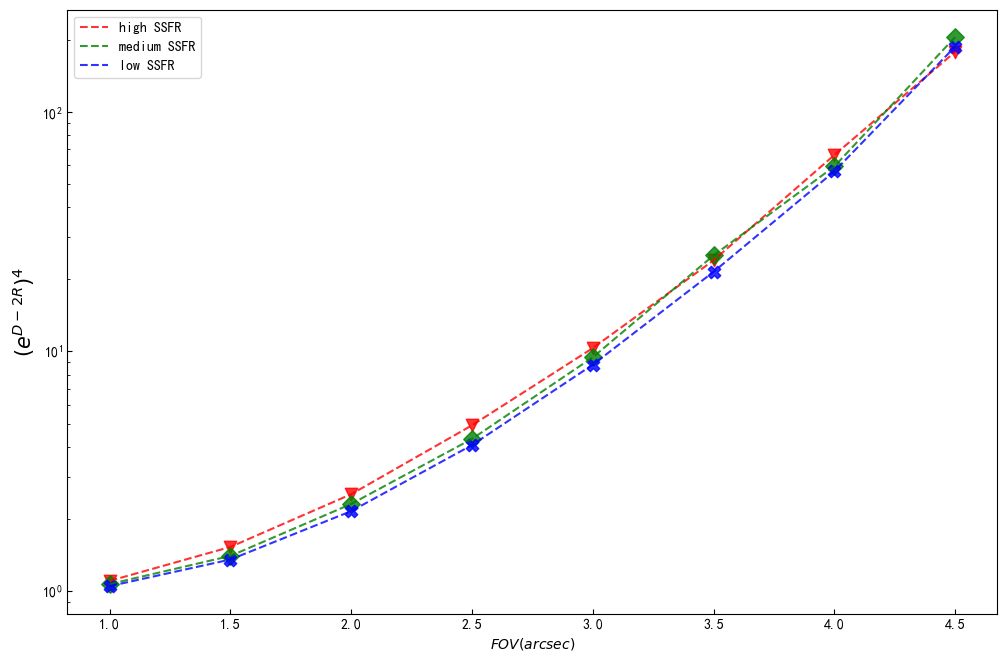

In [564]:
plt.figure(figsize=(6,12),dpi=100)
plt.yscale('log')     # 'linear', 'log', 'symlog', 'logit', 'function', 'functionlog'
x=[1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11]

enhance=3
# yerr=?

colour=['r','g','b']
fmt=['v','D','X']
lab=['high SSFR','medium SSFR','low SSFR']

for i in [0,1,2]:
    plt.errorbar(x=x[0:8],y=sample_average[i,0:8]**enhance,fmt='--',c=colour[i],label=lab[i],elinewidth=4,capsize=3,alpha=0.8)
    plt.scatter(x=x[0:8],y=sample_average[i,0:8]**enhance,marker=fmt[i],c=colour[i],s=80,alpha=0.8)
    '''
    plt.errorbar(x=x[0:8],y=sample_average[0,0:8]**enhance,fmt='--',c='r',label='high SSFR')
    plt.errorbar(x=x[0:8],y=sample_average[1,0:8]**enhance,fmt='--',c='g',label='medium SSFR')
    plt.errorbar(x=x[0:8],y=sample_average[2,0:8]**enhance,fmt='--',c='b',label='low SSFR')
    '''
# plt.errorbar(x=x[0:8],y=sample_merger_average[0:8]**enhance,fmt='-',label='merger')

plt.legend()


plt.xlabel(r"$FOV(arcsec)$")
plt.ylabel(r"$({e^{D-{2R}}})^4$", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.legend(fontsize=15)
# 将图片保存在当前目录
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('D_2.png', dpi=500)
plt.show()

In [17]:
sample_merger_average[0:8]

array([1.02169954, 1.10357007, 1.30020764, 1.5943811 , 1.97272564,
       2.7241854 , 3.73961659, 5.42487308])

In [18]:
print(sample_average[:,0:8])

[[1.03353451 1.15227848 1.36418442 1.70082048 2.17785846 2.88443025
  4.04119019 5.621983  ]
 [1.02309361 1.11957568 1.3221955  1.62842218 2.11463294 2.93009913
  3.89535613 5.89518447]
 [1.01637016 1.10679492 1.29221051 1.59655369 2.06505851 2.78003771
  3.83444775 5.71767678]]


#### 不同质量区间的SSFR

In [19]:
# 普通样本
# 获得sample_average_mass_1,sample_average_mass_2,sample_average_mass_3,sample_average_mass_4
# 获得sample_average_merger_mass_1,sample_average_merger_mass_2,sample_average_merger_mass_3,sample_average_merger_mass_4

data_stacked_sorted_by_mass=data_stacked.sort_values('mass_best',ascending=False)

t=int(len(data_stacked)/4)

data_stacked_sorted_by_mass_1=data_stacked_sorted_by_mass.iloc[0:t,:]
data_stacked_sorted_by_mass_1_SSFR=data_stacked_sorted_by_mass_1.sort_values('ssfr_best',ascending=False)
tt=int(len(data_stacked_sorted_by_mass_1_SSFR)/4)
data_stacked_sorted_by_mass_1_SSFR_1=data_stacked_sorted_by_mass_1_SSFR.iloc[0:tt,:]
data_stacked_sorted_by_mass_1_SSFR_2=data_stacked_sorted_by_mass_1_SSFR.iloc[tt:2*tt,:]
data_stacked_sorted_by_mass_1_SSFR_3=data_stacked_sorted_by_mass_1_SSFR.iloc[2*tt:3*tt,:]
# data_stacked_sorted_by_mass_1_SSFR_4=data_stacked_sorted_by_mass_1_SSFR.iloc[3*tt:,:]

sample_average_mass_1=-1*np.ones((3,len(l)))
for i in range(0,np.shape(sample_average_mass_1)[1]):
    sample_average_mass_1[0][i]=np.mean(data_stacked_sorted_by_mass_1_SSFR_1[l[i]])
    sample_average_mass_1[1][i]=np.mean(data_stacked_sorted_by_mass_1_SSFR_2[l[i]])
    sample_average_mass_1[2][i]=np.mean(data_stacked_sorted_by_mass_1_SSFR_3[l[i]])



data_stacked_sorted_by_mass_2=data_stacked_sorted_by_mass.iloc[t:2*t,:]
data_stacked_sorted_by_mass_2_SSFR=data_stacked_sorted_by_mass_2.sort_values('ssfr_best',ascending=False)
tt=int(len(data_stacked_sorted_by_mass_2_SSFR)/4)
data_stacked_sorted_by_mass_2_SSFR_1=data_stacked_sorted_by_mass_2_SSFR.iloc[0:tt,:]
data_stacked_sorted_by_mass_2_SSFR_2=data_stacked_sorted_by_mass_2_SSFR.iloc[tt:2*tt,:]
data_stacked_sorted_by_mass_2_SSFR_3=data_stacked_sorted_by_mass_2_SSFR.iloc[2*tt:3*tt,:]
# data_stacked_sorted_by_mass_2_SSFR_4=data_stacked_sorted_by_mass_2_SSFR.iloc[3*tt:,:]

sample_average_mass_2=-1*np.ones((3,len(l)))
for i in range(0,np.shape(sample_average_mass_2)[1]):
    sample_average_mass_2[0][i]=np.mean(data_stacked_sorted_by_mass_2_SSFR_1[l[i]])
    sample_average_mass_2[1][i]=np.mean(data_stacked_sorted_by_mass_2_SSFR_2[l[i]])
    sample_average_mass_2[2][i]=np.mean(data_stacked_sorted_by_mass_2_SSFR_3[l[i]])



data_stacked_sorted_by_mass_3=data_stacked_sorted_by_mass.iloc[2*t:3*t,:]
data_stacked_sorted_by_mass_3_SSFR=data_stacked_sorted_by_mass_3.sort_values('ssfr_best',ascending=False)
tt=int(len(data_stacked_sorted_by_mass_3_SSFR)/4)
data_stacked_sorted_by_mass_3_SSFR_1=data_stacked_sorted_by_mass_3_SSFR.iloc[0:tt,:]
data_stacked_sorted_by_mass_3_SSFR_2=data_stacked_sorted_by_mass_3_SSFR.iloc[tt:2*tt,:]
data_stacked_sorted_by_mass_3_SSFR_3=data_stacked_sorted_by_mass_3_SSFR.iloc[2*tt:3*tt,:]
# data_stacked_sorted_by_mass_3_SSFR_4=data_stacked_sorted_by_mass_3_SSFR.iloc[3*tt:,:]

sample_average_mass_3=-1*np.ones((3,len(l)))
for i in range(0,np.shape(sample_average_mass_3)[1]):
    sample_average_mass_3[0][i]=np.mean(data_stacked_sorted_by_mass_3_SSFR_1[l[i]])
    sample_average_mass_3[1][i]=np.mean(data_stacked_sorted_by_mass_3_SSFR_2[l[i]])
    sample_average_mass_3[2][i]=np.mean(data_stacked_sorted_by_mass_3_SSFR_3[l[i]])



data_stacked_sorted_by_mass_4=data_stacked_sorted_by_mass.iloc[3*t:,:]
data_stacked_sorted_by_mass_4_SSFR=data_stacked_sorted_by_mass_4.sort_values('ssfr_best',ascending=False)
tt=int(len(data_stacked_sorted_by_mass_4_SSFR)/4)
data_stacked_sorted_by_mass_4_SSFR_1=data_stacked_sorted_by_mass_4_SSFR.iloc[0:tt,:]
data_stacked_sorted_by_mass_4_SSFR_2=data_stacked_sorted_by_mass_4_SSFR.iloc[tt:2*tt,:]
data_stacked_sorted_by_mass_4_SSFR_3=data_stacked_sorted_by_mass_4_SSFR.iloc[2*tt:3*tt,:]
# data_stacked_sorted_by_mass_4_SSFR_4=data_stacked_sorted_by_mass_4_SSFR.iloc[3*tt:,:]

sample_average_mass_4=-1*np.ones((3,len(l)))
for i in range(0,np.shape(sample_average_mass_4)[1]):
    sample_average_mass_4[0][i]=np.mean(data_stacked_sorted_by_mass_4_SSFR_1[l[i]])
    sample_average_mass_4[1][i]=np.mean(data_stacked_sorted_by_mass_4_SSFR_2[l[i]])
    sample_average_mass_4[2][i]=np.mean(data_stacked_sorted_by_mass_4_SSFR_3[l[i]])

# merger

data_stacked_sorted_merger_by_mass=data_stacked_sorted_by_mass[data_stacked_sorted_by_mass['merger']==1]
t=int(len(data_stacked_sorted_merger_by_mass)/4)

data_stacked_sorted_merger_by_mass_1=data_stacked_sorted_merger_by_mass.iloc[0:t,:]
data_stacked_sorted_merger_by_mass_2=data_stacked_sorted_merger_by_mass.iloc[t:2*t,:]
data_stacked_sorted_merger_by_mass_3=data_stacked_sorted_merger_by_mass.iloc[2*t:3*t,:]
data_stacked_sorted_merger_by_mass_4=data_stacked_sorted_merger_by_mass.iloc[3*t:4*t,:]

sample_average_merger_mass=-1*np.ones((4,len(l)))
for i in range(0,np.shape(sample_average_merger_mass)[1]):
    sample_average_merger_mass[0][i]=np.mean(data_stacked_sorted_merger_by_mass_1[l[i]])
    sample_average_merger_mass[1][i]=np.mean(data_stacked_sorted_merger_by_mass_2[l[i]])
    sample_average_merger_mass[2][i]=np.mean(data_stacked_sorted_merger_by_mass_3[l[i]])
    sample_average_merger_mass[3][i]=np.mean(data_stacked_sorted_merger_by_mass_4[l[i]])


##### 绘图
明显可见SSFR随质量的变化情况

由以下两个图可见，小尺度上时，SFFR与空间成团性相关，表明SSFR增强只作用于小尺度上——受潮汐作用引起的恒星形成

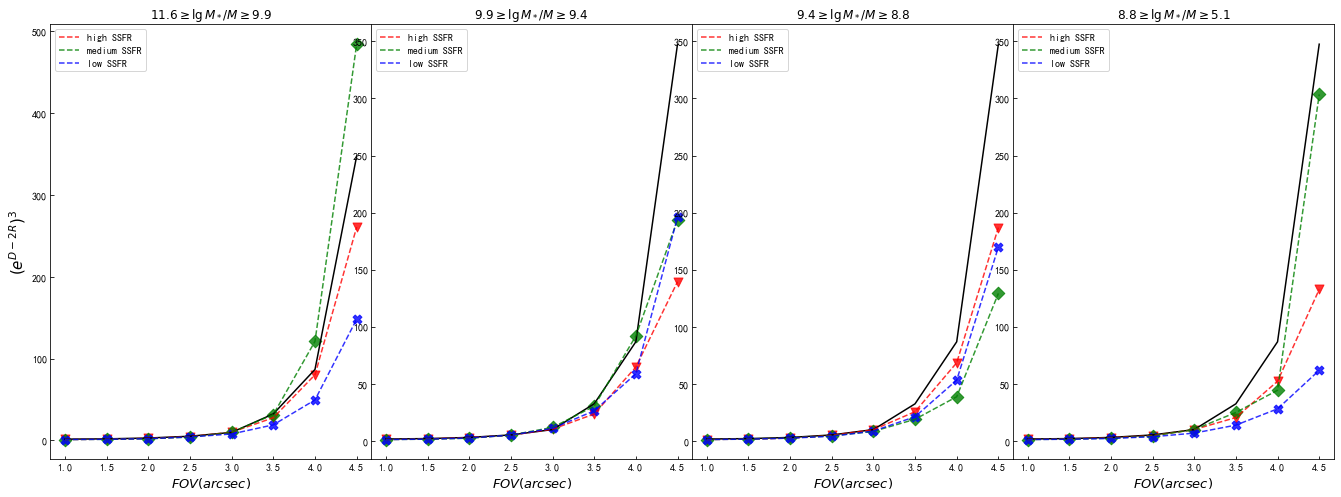

In [562]:
# sample_average_mass_1,sample_average_mass_2,sample_average_mass_3,sample_average_mass_4
# sample_average_merger_mass

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True)
figsize=(23, 12)
fig,ax=plt.subplots(nrows=1, ncols=4,sharex=True)
plt.rcParams['figure.figsize'] = [23, 8]
plt.rcParams['savefig.dpi']=300
x=[1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11]
##################################################################################################
ax1=ax[0]

colour=['r','g','b']
fmt=['v','D','X']
lab=['high SSFR','medium SSFR','low SSFR']
ax1.errorbar(x=x[0:8],y=(sample_average_merger_mass[0,0:8]**3)/0.7,fmt='-',c='black',elinewidth=3,capsize=3,alpha=1)

for i in [0,1,2]:
    ax1.errorbar(x=x[0:8],y=sample_average_mass_1[i,0:8]**3,fmt='--',c=colour[i],label=lab[i],elinewidth=4,capsize=3,alpha=0.8)
    ax1.scatter(x=x[0:8],y=sample_average_mass_1[i,0:8]**3,marker=fmt[i],c=colour[i],s=80,alpha=0.8)
    # ax1.errorbar(x=x[0:8],y=sample_average_mass_1[i,0:8]**3,fmt='--',c='g',label='medium SSFR',elinewidth=3,capsize=3,alpha=0.8)
    # ax1.errorbar(x=x[0:8],y=sample_average_mass_1[i,0:8]**3,fmt='--',c='b',label='low SSFR',elinewidth=3,capsize=3,alpha=0.8)

# ax1.errorbar(x=x[0:8],y=sample_average_merger_mass[0,0:8]**3,fmt='-',c='r',label='merger',elinewidth=2,capsize=3,alpha=0.8)

ax1.legend()
ax1.set_xlabel(r"$FOV(arcsec)$",fontsize=13)
ax1.set_ylabel(r"$({e^{D-{2R}}})^3$",fontsize=15)
ax1.set_title("$11.6 \geq \lg M_*/M \geq 9.9$")#(9.944, 11.614)
######################################################################################################
ax2=ax[1]
ax2.errorbar(x=x[0:8],y=(sample_average_merger_mass[0,0:8]**3)/0.7,fmt='-',c='black',elinewidth=3,capsize=3,alpha=1)

for i in [0,1,2]:
    ax2.errorbar(x=x[0:8],y=sample_average_mass_2[i,0:8]**3,fmt='--',c=colour[i],label=lab[i],elinewidth=4,capsize=3,alpha=0.8)
    ax2.scatter(x=x[0:8],y=sample_average_mass_2[i,0:8]**3,marker=fmt[i],c=colour[i],s=80,alpha=0.8)
    '''
    ax2.errorbar(x=x[0:8],y=sample_average_mass_2[0,0:8]**3,fmt='--',c='r',label='high SSFR',elinewidth=2,capsize=3,alpha=0.8)
    ax2.errorbar(x=x[0:8],y=sample_average_mass_2[1,0:8]**3,fmt='--',c='g',label='medium SSFR',elinewidth=2,capsize=3,alpha=0.8)
    ax2.errorbar(x=x[0:8],y=sample_average_mass_2[2,0:8]**3,fmt='--',c='b',label='low SSFR',elinewidth=2,capsize=3,alpha=0.8)
    '''
# ax2.errorbar(x=x[0:8],y=sample_average_merger_mass[1,0:8]**3,fmt='-',c='r',label='merger',elinewidth=2,capsize=3,alpha=0.8)

ax2.legend()

ax2.set_title("$11.8 \geq \lg M_*/M \geq 9.83$")
ax2.set_xlabel(r"$FOV(arcsec)$",fontsize=13)
ax2.legend()
ax2.set_title("$9.9 \geq \lg M_*/M \geq 9.4$")
#plt.suptitle("一张画布两个子图,并共享y坐标")
######################################################################################################
ax3=ax[2]

ax3.errorbar(x=x[0:8],y=(sample_average_merger_mass[0,0:8]**3)/0.7,fmt='-',c='black',elinewidth=3,capsize=3,alpha=1)
for i in [0,1,2]:
    ax3.errorbar(x=x[0:8],y=sample_average_mass_3[i,0:8]**3,fmt='--',c=colour[i],label=lab[i],elinewidth=4,capsize=3,alpha=0.8)
    ax3.scatter(x=x[0:8],y=sample_average_mass_3[i,0:8]**3,marker=fmt[i],c=colour[i],s=80,alpha=0.8)
    '''
    ax3.errorbar(x=x[0:8],y=sample_average_mass_3[0,0:8]**3,fmt='--',c='r',label='high SSFR',elinewidth=2,capsize=3,alpha=0.8)
    ax3.errorbar(x=x[0:8],y=sample_average_mass_3[1,0:8]**3,fmt='--',c='g',label='medium SSFR',elinewidth=2,capsize=3,alpha=0.8)
    ax3.errorbar(x=x[0:8],y=sample_average_mass_3[2,0:8]**3,fmt='--',c='b',label='low SSFR',elinewidth=2,capsize=3,alpha=0.8)
    '''
# ax3.errorbar(x=x[0:8],y=sample_average_merger_mass[2,0:8]**3,fmt='-',c='r',label='merger',elinewidth=2,capsize=3,alpha=0.8)

ax3.legend()
ax3.set_title("$9.4 \geq \lg M_*/M \geq 8.8$")
ax3.set_xlabel(r"$FOV(arcsec)$",fontsize=13)
######################################################################################################
ax4=ax[3]

ax4.errorbar(x=x[0:8],y=(sample_average_merger_mass[0,0:8]**3)/0.7,fmt='-',c='black',elinewidth=3,capsize=3,alpha=1)
for i in [0,1,2]:
    ax4.errorbar(x=x[0:8],y=sample_average_mass_4[i,0:8]**3,fmt='--',c=colour[i],label=lab[i],elinewidth=4,capsize=3,alpha=0.8)
    ax4.scatter(x=x[0:8],y=sample_average_mass_4[i,0:8]**3,marker=fmt[i],c=colour[i],s=80,alpha=0.8)
    '''
    ax4.errorbar(x=x[0:8],y=sample_average_mass_4[0,0:8]**3,fmt='--',c='r',label='high SSFR',elinewidth=2,capsize=3,alpha=0.8)
    ax4.errorbar(x=x[0:8],y=sample_average_mass_4[1,0:8]**3,fmt='--',c='g',label='medium SSFR',elinewidth=2,capsize=3,alpha=0.8)
    ax4.errorbar(x=x[0:8],y=sample_average_mass_4[2,0:8]**3,fmt='--',c='b',label='low SSFR',elinewidth=2,capsize=3,alpha=0.8)
    '''
# ax4.errorbar(x=x[0:8],y=sample_average_merger_mass[3,0:8]**3,fmt='-',c='r',label='merger',elinewidth=2,capsize=3,alpha=0.8)

ax4.set_xlabel(r"$FOV(arcsec)$",fontsize=13)

ax4.legend()
ax4.set_title("$8.8 \geq \lg M_*/M \geq 5.1$")
###################################################################################################
fig.subplots_adjust(wspace=0)
plt.savefig('E.png',dpi=500)
plt.show()

In [21]:
print((min(data_stacked_sorted_by_mass_1['mass_best']), max(data_stacked_sorted_by_mass_1['mass_best'])))
print((min(data_stacked_sorted_by_mass_2['mass_best']), max(data_stacked_sorted_by_mass_2['mass_best'])))
print((min(data_stacked_sorted_by_mass_3['mass_best']), max(data_stacked_sorted_by_mass_3['mass_best'])))
print((min(data_stacked_sorted_by_mass_4['mass_best']), max(data_stacked_sorted_by_mass_4['mass_best'])))

(9.944, 11.614)
(9.397, 9.944)
(8.83, 9.397)
(5.107, 8.83)


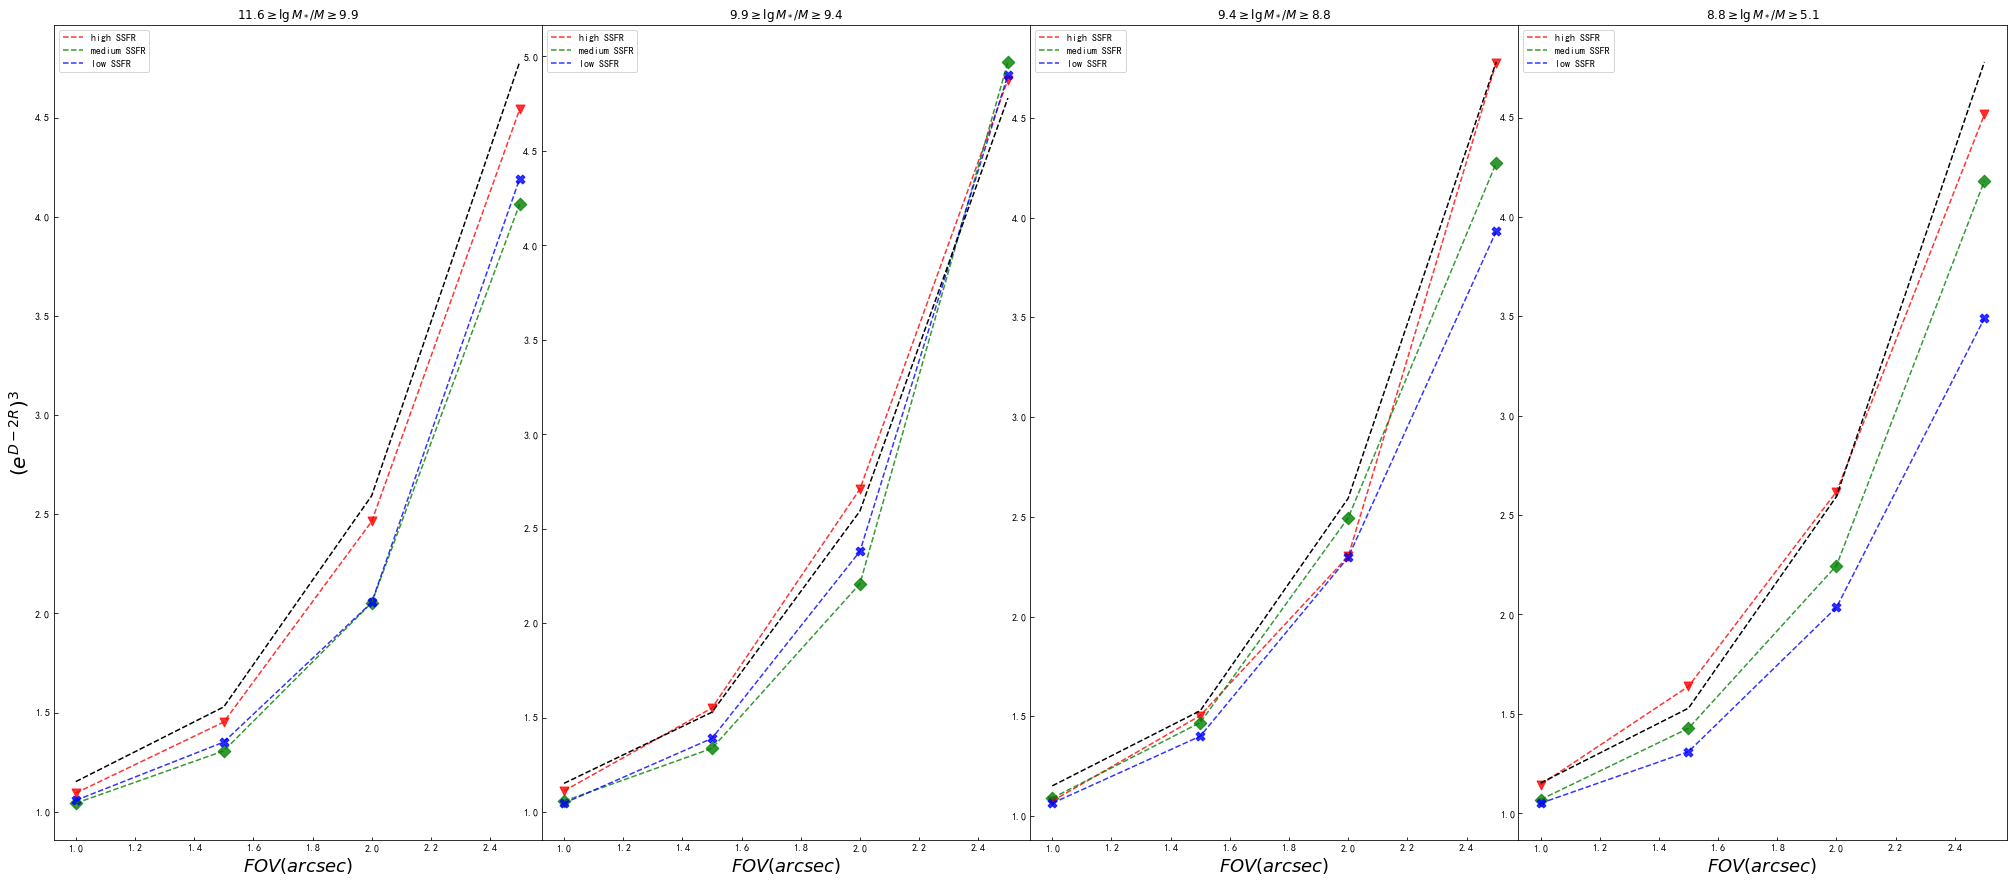

In [578]:
# sample_average_mass_1,sample_average_mass_2,sample_average_mass_3,sample_average_mass_4
# sample_average_merger_mass

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True)
#figsize=(23, 12)
fig,ax=plt.subplots(nrows=1, ncols=4,sharex=True)
plt.rcParams['figure.figsize'] = [35, 15]
plt.rcParams['savefig.dpi']=400
x=[1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11]
a=4
##################################################################################################
ax1=ax[0]
for i in [0,1,2]:
    ax1.errorbar(x=x[0:a],y=sample_average_mass_1[i,0:a]**3,fmt='--',c=colour[i],label=lab[i],elinewidth=4,capsize=3,alpha=0.8)
    ax1.scatter(x=x[0:a],y=sample_average_mass_1[i,0:a]**3,marker=fmt[i],c=colour[i],s=80,alpha=0.8)

# ax1.errorbar(x=x[0:a],y=sample_average_merger_mass[0,0:a]**3,fmt='-',c='r',label='merger',elinewidth=2,capsize=3,alpha=0.8)
ax1.errorbar(x=x[0:a],y=(sample_average_mass_1[0,0:a]**3)/0.95,fmt='--',elinewidth=2.5,capsize=3,alpha=1,c='black')
ax1.legend()
ax1.set_xlabel(r"$FOV(arcsec)$",fontsize=18)
ax1.set_ylabel(r"$({e^{D-{2R}}})^3$",fontsize=20)
ax1.set_title("$11.6 \geq \lg M_*/M \geq 9.9$")
######################################################################################################
ax2=ax[1]

# ax2.errorbar(x=x[0:a],y=(sample_average_mass_1[0,0:a]**3)/0.9,fmt='--',label='high SSFR',elinewidth=2.5,capsize=3,alpha=1,c='black')

for i in [0,1,2]:
    ax2.errorbar(x=x[0:a],y=sample_average_mass_2[i,0:a]**3,fmt='--',c=colour[i],label=lab[i],elinewidth=4,capsize=3,alpha=0.8)
    ax2.scatter(x=x[0:a],y=sample_average_mass_2[i,0:a]**3,marker=fmt[i],c=colour[i],s=80,alpha=0.8)
ax2.errorbar(x=x[0:a],y=(sample_average_mass_1[0,0:a]**3)/0.95,fmt='--',elinewidth=2.5,capsize=3,alpha=1,c='black')

'''
ax2.errorbar(x=x[0:a],y=sample_average_mass_2[0,0:a]**3,fmt='--',c='r',label='high SSFR',elinewidth=2,capsize=3,alpha=0.8)

ax2.errorbar(x=x[0:a],y=sample_average_mass_2[1,0:a]**3,fmt='--',c='g',label='medium SSFR',elinewidth=2,capsize=3,alpha=0.8)

ax2.errorbar(x=x[0:a],y=sample_average_mass_2[2,0:a]**3,fmt='--',c='b',label='low SSFR',elinewidth=2,capsize=3,alpha=0.8)
'''
# ax2.errorbar(x=x[0:a],y=sample_average_merger_mass[1,0:a]**3,fmt='-',c='r',label='merger',elinewidth=2,capsize=3,alpha=0.8)

ax2.legend()

ax2.set_title("$11.8 \geq \lg M_*/M \geq 9.83$")
ax2.set_xlabel(r"$FOV(arcsec)$",fontsize=18)
ax2.legend()
ax2.set_title("$9.9 \geq \lg M_*/M \geq 9.4$")
#plt.suptitle("一张画布两个子图,并共享y坐标")
######################################################################################################
ax3=ax[2]

# ax3.errorbar(x=x[0:a],y=(sample_average_mass_1[0,0:a]**3)/0.9,fmt='--',label='high SSFR',elinewidth=2.5,capsize=3,alpha=1,c='black')
for i in [0,1,2]:
    ax3.errorbar(x=x[0:a],y=sample_average_mass_3[i,0:a]**3,fmt='--',c=colour[i],label=lab[i],elinewidth=4,capsize=3,alpha=0.8)
    ax3.scatter(x=x[0:a],y=sample_average_mass_3[i,0:a]**3,marker=fmt[i],c=colour[i],s=80,alpha=0.8)
# ax3.errorbar(x=x[0:a],y=sample_average_merger_mass[2,0:a]**3,fmt='-',c='r',label='merger',elinewidth=2,capsize=3,alpha=0.8)
ax3.errorbar(x=x[0:a],y=(sample_average_mass_1[0,0:a]**3)/0.95,fmt='--',elinewidth=2.5,capsize=3,alpha=1,c='black')

ax3.legend()
ax3.set_title("$9.4 \geq \lg M_*/M \geq 8.8$")
ax3.set_xlabel(r"$FOV(arcsec)$",fontsize=18)
######################################################################################################
ax4=ax[3]

# ax4.errorbar(x=x[0:a],y=(sample_average_mass_1[0,0:a]**3)/0.9,fmt='--',label='high SSFR',elinewidth=2.5,capsize=3,alpha=1,c='black')
for i in [0,1,2]:
    ax4.errorbar(x=x[0:a],y=sample_average_mass_4[i,0:a]**3,fmt='--',c=colour[i],label=lab[i],elinewidth=4,capsize=3,alpha=0.8)
    ax4.scatter(x=x[0:a],y=sample_average_mass_4[i,0:a]**3,marker=fmt[i],c=colour[i],s=80,alpha=0.8)
# ax4.errorbar(x=x[0:a],y=sample_average_merger_mass[3,0:a]**3,fmt='-',c='r',label='merger',elinewidth=2,capsize=3,alpha=0.8)
ax4.errorbar(x=x[0:a],y=(sample_average_mass_1[0,0:a]**3)/0.95,fmt='--',elinewidth=2.5,capsize=3,alpha=1,c='black')

ax4.set_xlabel(r"$FOV(arcsec)$",fontsize=18)

ax4.legend()
ax4.set_title("$8.8 \geq \lg M_*/M \geq 5.1$")
###################################################################################################
fig.subplots_adjust(wspace=0)
plt.savefig('F.png',dpi=500)
plt.show()

#### 光度分异关系

In [23]:
# 先将SSFR降序排列后分为三类
data_stacked_sorted_by_ssfr_1=data_stacked_sorted_by_ssfr.iloc[0:len_,:]
data_stacked_sorted_by_ssfr_2=data_stacked_sorted_by_ssfr.iloc[len_:2*len_,:]
data_stacked_sorted_by_ssfr_3=data_stacked_sorted_by_ssfr.iloc[2*len_:3*len_,:]
data_stacked_sorted_by_ssfr_4=data_stacked_sorted_by_ssfr.iloc[3*len_:,:]

In [24]:
data_stacked_sorted_by_ssfr_4

,ra,dec,id,x_image,y_image,flux_814w,fluxerr_814w,type,zpdf,zpdf_l68,...,desity_2,desity_2.5,desity_3,desity_3.5,desity_4,desity_4.5,desity_5,desity_7,desity_9,desity_11
7013,150.215020,2.236284,616162,20348.53906,22688.54297,24.61,0.070,0,0.327,0.292,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.718282,20.085537,14.391916,0.513417
18500,149.949748,2.348364,691397,26709.91797,25378.62695,24.07,0.036,0,0.359,0.330,...,1.000000,1.000000,1.000000,1.000000,2.718282,2.718282,1.395612,5.294490,0.716531,0.035674
2250,149.876981,2.057122,498692,28456.01758,18389.00586,21.75,0.012,0,0.637,0.624,...,1.000000,1.000000,1.000000,2.718282,2.718282,7.389056,3.793668,1.000000,0.367879,0.716531
23461,149.781092,2.330543,679363,30754.45508,24951.64648,23.38,0.026,0,0.697,0.673,...,2.718282,2.718282,2.718282,2.718282,2.718282,2.718282,0.716531,0.513417,0.049787,0.025562
5152,149.833797,2.270678,639454,29490.81055,23514.58203,23.56,0.027,0,0.224,0.215,...,1.000000,1.000000,1.000000,1.000000,2.718282,7.389056,7.389056,1.947734,0.035674,0.000335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,149.969042,2.208739,600942,26247.59570,22027.56641,19.36,0.002,0,0.280,0.273,...,1.000000,1.000000,1.000000,1.000000,0.513417,0.513417,0.513417,0.188876,0.367879,0.049787
8033,150.095654,2.203711,597237,23211.15234,21906.70898,20.85,0.007,0,0.726,0.719,...,1.000000,7.389056,7.389056,54.598150,148.413159,148.413159,1096.633158,22026.465795,83561.096119,30740.409344
891,149.942028,2.098586,526798,26895.75781,19383.94531,20.37,0.004,0,0.680,0.673,...,1.000000,1.000000,1.000000,2.718282,7.389056,7.389056,7.389056,106.342675,207.127249,28.031625
10343,149.719230,2.274343,642386,32238.34180,23603.19531,19.87,0.003,0,0.520,0.511,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.793668,0.069483,0.049787


#### 在F814波段的光度分异情况，未发现SSFR与光度的关系

In [25]:
# 获得sample_average_mag_1,sample_average_mag_2,sample_average_mag_3,sample_average_mag_4

data_stacked_sorted_by_mag=data_stacked.sort_values('flux_814w',ascending=False)

t=int(len(data_stacked)/4)
########
data_stacked_sorted_by_mag_1=data_stacked_sorted_by_mag.iloc[0:t,:]
data_stacked_sorted_by_mag_1_SSFR=data_stacked_sorted_by_mag_1.sort_values('ssfr_best',ascending=False)
tt=int(len(data_stacked_sorted_by_mag_1_SSFR)/4)
data_stacked_sorted_by_mag_1_SSFR_1=data_stacked_sorted_by_mag_1_SSFR.iloc[0:tt,:]
data_stacked_sorted_by_mag_1_SSFR_2=data_stacked_sorted_by_mag_1_SSFR.iloc[tt:2*tt,:]
data_stacked_sorted_by_mag_1_SSFR_3=data_stacked_sorted_by_mag_1_SSFR.iloc[2*tt:3*tt,:]
data_stacked_sorted_by_mag_1_SSFR_4=data_stacked_sorted_by_mag_1_SSFR.iloc[3*tt:,:]

sample_average_mag_1=-1*np.ones((4,len(l)))
for i in range(0,np.shape(sample_average_mag_1)[1]):
    sample_average_mag_1[0][i]=np.mean(data_stacked_sorted_by_mag_1_SSFR_1[l[i]])
    sample_average_mag_1[1][i]=np.mean(data_stacked_sorted_by_mag_1_SSFR_2[l[i]])
    sample_average_mag_1[2][i]=np.mean(data_stacked_sorted_by_mag_1_SSFR_3[l[i]])
    sample_average_mag_1[3][i]=np.mean(data_stacked_sorted_by_mag_1_SSFR_4[l[i]])

#####
data_stacked_sorted_by_mag_2=data_stacked_sorted_by_mag.iloc[t:2*t,:]
data_stacked_sorted_by_mag_2_SSFR=data_stacked_sorted_by_mag_2.sort_values('ssfr_best',ascending=False)
tt=int(len(data_stacked_sorted_by_mag_2_SSFR)/4)
data_stacked_sorted_by_mag_2_SSFR_1=data_stacked_sorted_by_mag_2_SSFR.iloc[0:tt,:]
data_stacked_sorted_by_mag_2_SSFR_2=data_stacked_sorted_by_mag_2_SSFR.iloc[tt:2*tt,:]
data_stacked_sorted_by_mag_2_SSFR_3=data_stacked_sorted_by_mag_2_SSFR.iloc[2*tt:3*tt,:]
data_stacked_sorted_by_mag_2_SSFR_4=data_stacked_sorted_by_mag_2_SSFR.iloc[3*tt:,:]

sample_average_mag_2=-1*np.ones((4,len(l)))
for i in range(0,np.shape(sample_average_mag_2)[1]):
    sample_average_mag_2[0][i]=np.mean(data_stacked_sorted_by_mag_2_SSFR_1[l[i]])
    sample_average_mag_2[1][i]=np.mean(data_stacked_sorted_by_mag_2_SSFR_2[l[i]])
    sample_average_mag_2[2][i]=np.mean(data_stacked_sorted_by_mag_2_SSFR_3[l[i]])
    sample_average_mag_2[3][i]=np.mean(data_stacked_sorted_by_mag_2_SSFR_4[l[i]])


########
data_stacked_sorted_by_mag_3=data_stacked_sorted_by_mag.iloc[2*t:3*t,:]
data_stacked_sorted_by_mag_3_SSFR=data_stacked_sorted_by_mag_3.sort_values('ssfr_best',ascending=False)
tt=int(len(data_stacked_sorted_by_mag_3_SSFR)/4)
data_stacked_sorted_by_mag_3_SSFR_1=data_stacked_sorted_by_mag_3_SSFR.iloc[0:tt,:]
data_stacked_sorted_by_mag_3_SSFR_2=data_stacked_sorted_by_mag_3_SSFR.iloc[tt:2*tt,:]
data_stacked_sorted_by_mag_3_SSFR_3=data_stacked_sorted_by_mag_3_SSFR.iloc[2*tt:3*tt,:]
data_stacked_sorted_by_mag_3_SSFR_4=data_stacked_sorted_by_mag_3_SSFR.iloc[3*tt:,:]

sample_average_mag_3=-1*np.ones((4,len(l)))
for i in range(0,np.shape(sample_average_mag_3)[1]):
    sample_average_mag_3[0][i]=np.mean(data_stacked_sorted_by_mag_3_SSFR_1[l[i]])
    sample_average_mag_3[1][i]=np.mean(data_stacked_sorted_by_mag_3_SSFR_2[l[i]])
    sample_average_mag_3[2][i]=np.mean(data_stacked_sorted_by_mag_3_SSFR_3[l[i]])
    sample_average_mag_3[3][i]=np.mean(data_stacked_sorted_by_mag_3_SSFR_4[l[i]])


###########
data_stacked_sorted_by_mag_4=data_stacked_sorted_by_mag.iloc[3*t:4*t,:]
data_stacked_sorted_by_mag_4_SSFR=data_stacked_sorted_by_mag_4.sort_values('ssfr_best',ascending=False)
tt=int(len(data_stacked_sorted_by_mag_4_SSFR)/4)
data_stacked_sorted_by_mag_4_SSFR_1=data_stacked_sorted_by_mag_4_SSFR.iloc[0:tt,:]
data_stacked_sorted_by_mag_4_SSFR_2=data_stacked_sorted_by_mag_4_SSFR.iloc[tt:2*tt,:]
data_stacked_sorted_by_mag_4_SSFR_3=data_stacked_sorted_by_mag_4_SSFR.iloc[2*tt:3*tt,:]
data_stacked_sorted_by_mag_4_SSFR_4=data_stacked_sorted_by_mag_4_SSFR.iloc[3*tt:,:]

sample_average_mag_4=-1*np.ones((4,len(l)))
for i in range(0,np.shape(sample_average_mag_4)[1]):
    sample_average_mag_4[0][i]=np.mean(data_stacked_sorted_by_mag_4_SSFR_1[l[i]])
    sample_average_mag_4[1][i]=np.mean(data_stacked_sorted_by_mag_4_SSFR_2[l[i]])
    sample_average_mag_4[2][i]=np.mean(data_stacked_sorted_by_mag_4_SSFR_3[l[i]])
    sample_average_mag_4[3][i]=np.mean(data_stacked_sorted_by_mag_4_SSFR_4[l[i]])

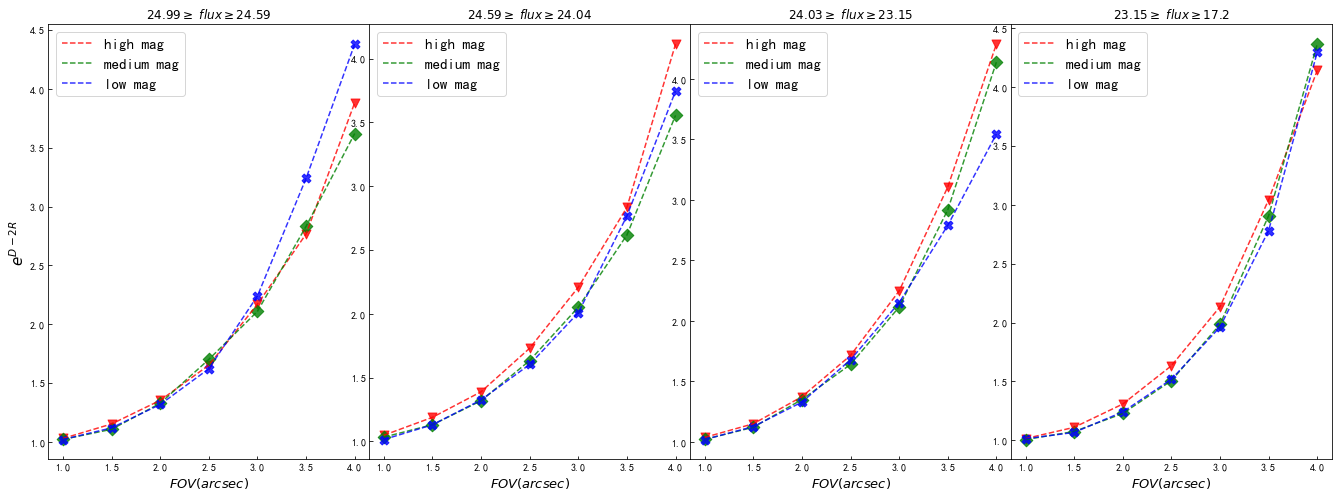

In [585]:
# sample_average_mass_1,sample_average_mass_2,sample_average_mass_3,sample_average_mass_4
# sample_average_merger_mass

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True)
figsize=(23, 12)
fig,ax=plt.subplots(nrows=1, ncols=4,sharex=True)
plt.rcParams['figure.figsize'] = [23, 8]
plt.rcParams['savefig.dpi']=300
x=[1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11]

lab=['high mag','medium mag','low mag']
##################################################################################################
ax1=ax[0]
for i in [0,1,2]:
    ax1.errorbar(x=x[0:7],y=sample_average_mag_1[i,0:7],fmt='--',label=lab[i],c=colour[i],elinewidth=2,capsize=3,alpha=0.8)
    ax1.scatter(x=x[0:7],y=sample_average_mag_1[i,0:7],marker=fmt[i],c=colour[i],s=80,alpha=0.8)

# ax1.errorbar(x=x[0:7],y=sample_average_mag_1[3,0:7],fmt='--',label='low mag',elinewidth=2,capsize=3,alpha=0.8)

# ax1.errorbar(x=x[0:7],y=sample_average_mag_3[2,0:7]/0.9,fmt='-',label='low mag',elinewidth=2,capsize=3,alpha=0.8)

ax1.legend(prop={'size': 15})
ax1.set_xlabel(r"$FOV(arcsec)$",fontsize=13)
ax1.set_ylabel(r"${e^{D-{2R}}}$",fontsize=15)
ax1.set_title("$24.99 \geq \ {flux} \geq 24.59$")
######################################################################################################
ax2=ax[1]
for i in [0,1,2]:
    ax2.errorbar(x=x[0:7],y=sample_average_mag_2[i,0:7],fmt='--',label=lab[i],c=colour[i],elinewidth=2,capsize=3,alpha=0.8)
    ax2.scatter(x=x[0:7],y=sample_average_mag_2[i,0:7],marker=fmt[i],c=colour[i],s=80,alpha=0.8)

# ax2.errorbar(x=x[0:7],y=sample_average_mag_2[3,0:7],fmt='--',label='low mag',elinewidth=2,capsize=3,alpha=0.8)

# ax2.errorbar(x=x[0:7],y=sample_average_mag_3[2,0:7]/0.9,fmt='-',label='low mag',elinewidth=2,capsize=3,alpha=0.8)

ax2.legend()

ax2.set_title("$24.59\geq \ {flux} \geq 24.04$")
ax2.set_xlabel(r"$FOV(arcsec)$",fontsize=13)
ax2.legend(prop={'size': 15})
#plt.suptitle("一张画布两个子图,并共享y坐标")
######################################################################################################
ax3=ax[2]
for i in [0,1,2]:
    ax3.errorbar(x=x[0:7],y=sample_average_mag_3[i,0:7],fmt='--',label=lab[i],c=colour[i],elinewidth=2,capsize=3,alpha=0.8)
    ax3.scatter(x=x[0:7],y=sample_average_mag_3[i,0:7],marker=fmt[i],c=colour[i],s=80,alpha=0.8)
# ax3.errorbar(x=x[0:7],y=sample_average_mag_3[3,0:7],fmt='--',label='low mag',elinewidth=2,capsize=3,alpha=0.8)

# ax3.errorbar(x=x[0:7],y=sample_average_mag_3[2,0:7]/0.9,fmt='-',label='low mag',elinewidth=2,capsize=3,alpha=0.8)

ax3.legend(prop={'size': 15})
ax3.set_title("$24.03 \geq \ {flux} \geq 23.15$")
ax3.set_xlabel(r"$FOV(arcsec)$",fontsize=13)
######################################################################################################
ax4=ax[3]

for i in [0,1,2]:
    ax4.errorbar(x=x[0:7],y=sample_average_mag_4[i,0:7],fmt='--',label=lab[i],c=colour[i],elinewidth=2,capsize=3,alpha=0.8)
    ax4.scatter(x=x[0:7],y=sample_average_mag_4[i,0:7],marker=fmt[i],c=colour[i],s=80,alpha=0.8)

# ax4.errorbar(x=x[0:7],y=sample_average_mag_4[3,0:7],fmt='--',label='low mag',elinewidth=2,capsize=3,alpha=0.8)

# ax4.errorbar(x=x[0:7],y=sample_average_mag_3[2,0:7]/0.9,fmt='-',label='low mag',elinewidth=2,capsize=3,alpha=0.8)

ax4.set_xlabel(r"$FOV(arcsec)$",fontsize=13)

ax4.legend(prop={'size': 15})
ax4.set_title("$23.15 \geq \ {flux} \geq 17.2$")
###################################################################################################
fig.subplots_adjust(wspace=0)
plt.savefig('G.png',dpi=350)
plt.show()

In [27]:
print(np.min(data_stacked_sorted_by_mag_1['flux_814w']))
print(np.max(data_stacked_sorted_by_mag_1['flux_814w']))

print(np.min(data_stacked_sorted_by_mag_2['flux_814w']))
print(np.max(data_stacked_sorted_by_mag_2['flux_814w']))

print(np.min(data_stacked_sorted_by_mag_3['flux_814w']))
print(np.max(data_stacked_sorted_by_mag_3['flux_814w']))

print(np.min(data_stacked_sorted_by_mag_4['flux_814w']))
print(np.max(data_stacked_sorted_by_mag_4['flux_814w']))

24.59
24.99
24.04
24.59
23.15
24.03
17.2
23.15


### 红移相关

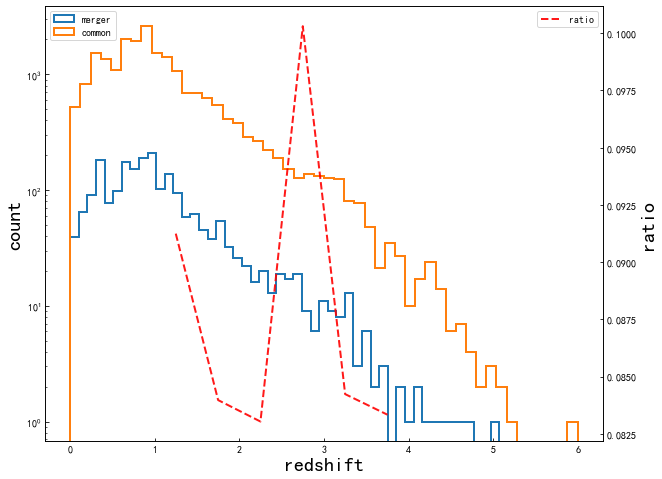

In [28]:
fontsize=20
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig,axes=plt.subplots()
fig.set_size_inches(10, 8)

bincount=50
merger=data_all[data_all['merger']==1]
common=data_all[data_all['merger']==0]

plt.yscale('log')
plt.hist(merger['zpdf'], bins=bincount, label='merger',
           histtype='step', linewidth=2)
plt.hist(common['zpdf'],bins=bincount, label='common',
           histtype='step', linewidth=2)


plt.legend(loc='upper left')

twin_axes=axes.twinx()

se1 = pd.cut(merger['zpdf'],np.arange(0,5.3,0.5))
count_merger=np.array(se1.value_counts())
se2 = pd.cut(common['zpdf'],np.arange(0,5.3,0.5))
count_common=np.array(se2.value_counts())
rate=count_merger/(count_common+count_merger)

twin_axes.errorbar(np.arange(0.25,5,0.5)[2:8],rate[2:8],c='r',label='ratio',linestyle='--',alpha=0.9,linewidth=2)
axes.set_xlabel("redshift",fontsize=fontsize)
axes.set_ylabel("count",fontsize=fontsize)
twin_axes.set_xlabel("X2", fontsize=fontsize)
twin_axes.set_ylabel("ratio", fontsize=fontsize)

plt.legend(loc='upper right')
#plt.savefig('n.png',dpi=300)
plt.show()

In [29]:
stastic

,0,1,2,3,4,5,6,7,8,9,...,23503,23504,23505,23506,23507,23508,23509,23510,23511,23512
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
5,0.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
6,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
7,0.0,4.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
8,0.0,4.0,0.0,2.0,2.0,2.0,3.0,1.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,1.0,5.0,0.0,2.0,2.0,4.0,3.0,1.0,2.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0
10,1.0,7.0,1.0,2.0,6.0,4.0,6.0,2.0,3.0,1.0,...,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0


In [30]:
pd.DataFrame(stastic_random_all)

,0,1,2,3,4,5,6,7,8,9,...,23503,23504,23505,23506,23507,23508,23509,23510,23511,23512
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333
6,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.666667,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.333333
7,0.333333,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.666667
8,0.333333,0.000000,0.666667,0.000000,0.666667,0.000000,0.000000,1.000000,0.666667,0.000000,...,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,1.333333,0.000000,0.333333,0.666667
9,1.333333,0.333333,1.666667,0.000000,1.666667,1.000000,0.666667,1.666667,1.333333,1.000000,...,2.000000,1.000000,0.666667,1.666667,1.000000,0.666667,2.000000,0.333333,0.666667,1.666667


### 衡量SSFR被增强程度的函数${E_x(FOV)}$

In [31]:
E_x=np.ones(12)
aver_ssfr=np.mean(data_all['ssfr_best'])
tem1,tem2=[],[]
for i in range(0,12):
    for j in range(0,len(data_all)):
        r=(stastic.iloc[i,j] - stastic_random_all[i,j])
        tem1.append(data_all['ssfr_best'][j] * r)
        tem2.append(r)
    s1,s2=sum(tem1),sum(tem2)
    tem1,tem2=[],[]
    E_x[i]=(s1/s2)-aver_ssfr
E=list(E_x)     # 得到对于所有星系的E_x

#######################################################

E_x_min=np.ones(12)
E_x_max=np.ones(12)

aver_ssfr_min=np.mean(data_all['ssfr_med_min68'])
aver_ssfr_max=np.mean(data_all['ssfr_med_max68'])

tem1_min,tem2_min=[],[]
tem1_max,tem2_max=[],[]

for i in range(0,12):
    for j in range(0,len(data_all)):
        r=(stastic.iloc[i,j] - stastic_random_all[i,j])
        tem1_min.append(data_all['ssfr_med_min68'][j] * r)
        tem2_min.append(r)

        tem1_max.append(data_all['ssfr_med_max68'][j] * r)
        tem2_max.append(r)

    s1_min,s2_min=sum(tem1_min),sum(tem2_min)
    s1_max,s2_max=sum(tem1_max),sum(tem2_max)

    tem1_min,tem2_min,tem1_max,tem2_max=[],[],[],[]
    E_x_min[i]=(s1_min/s2_min)-aver_ssfr
    E_x_max[i]=(s1_max/s2_max)-aver_ssfr

E=list(E_x)     # 得到对于所有星系的E_x_err_min
E_min=list(E_x_min)     # 得到对于所有星系的E_x_err_min
E_max=list(E_x_max)     # 得到对于所有星系的E_x_err_min

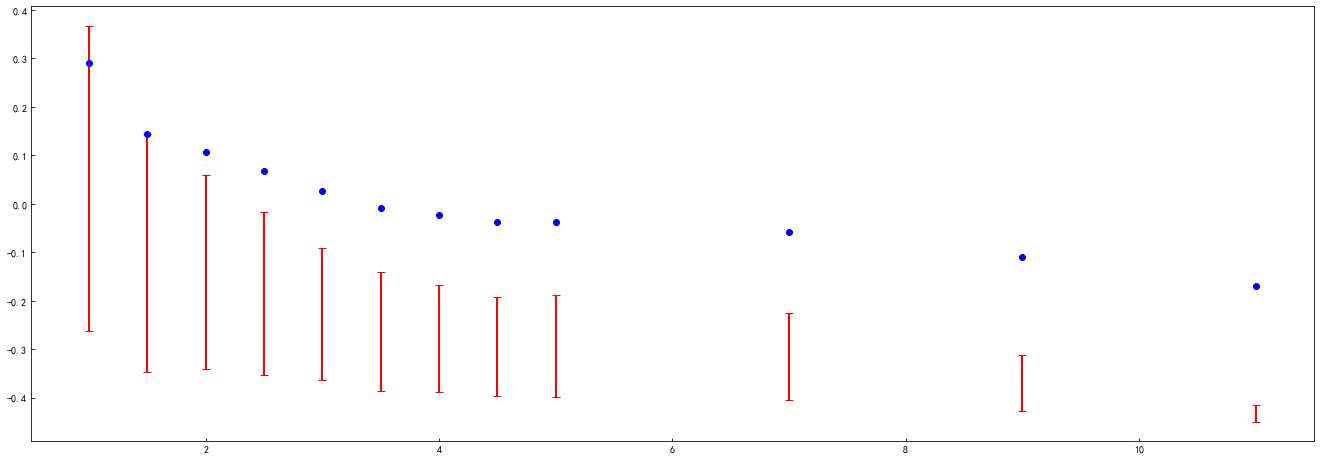

In [32]:
import matplotlib.pyplot as plt
import numpy as np
x=[1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11]
plt.errorbar(x,E,yerr=[E_max,E_min],fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
#fmt :   'o' ',' '.' 'x' '+' 'v' '^' '<' '>' 's' 'd' 'p'
plt.show()

In [33]:
np.shape(E)==np.shape(E_min)==np.shape(E_max)

True

#### 总体样本的FOV-E,以及随质量分异的FOV-E关系

In [34]:
# 计算质量分异的相关数据
data_all_tem=data_all
data_all_tem['ind']=list(range(0,len(data_all)))

data_all_by_mass=data_all_tem.sort_values('mass_best',ascending=False)
ll=int(len(data_all_by_mass)/3)

data_all_by_mass_1=data_all_by_mass.iloc[0:ll,:]
data_all_by_mass_2=data_all_by_mass.iloc[ll:2*ll,:]
data_all_by_mass_3=data_all_by_mass.iloc[2*ll:3*ll,:]

E_x_mass_1,E_x_mass_2,E_x_mass_3=np.ones(12),np.ones(12),np.ones(12)

aver_ssfr_mass_1=np.mean(data_all_by_mass_1['ssfr_best'])
aver_ssfr_mass_2=np.mean(data_all_by_mass_2['ssfr_best'])
aver_ssfr_mass_3=np.mean(data_all_by_mass_3['ssfr_best'])

In [35]:
tem1_mass_1,tem2_mass_1=[],[]
tem1_mass_2,tem2_mass_2=[],[]
tem1_mass_3,tem2_mass_3=[],[]

E_x_mass_1_max=np.ones(12)
E_x_mass_2_max=np.ones(12)
E_x_mass_3_max=np.ones(12)

E_x_mass_1_min=np.ones(12)
E_x_mass_2_min=np.ones(12)
E_x_mass_3_min=np.ones(12)

# 计算mass_1
for i in range(0,12):
    for j in range(0,len(data_all_by_mass_1)):
        inde=np.array(data_all_by_mass_1["ind"])[j]
        r=(stastic.iloc[i,inde] - stastic_random_all[i,inde])

        tem1_mass_1.append(np.array(data_all_by_mass_1['ssfr_best'])[j] * r)
        tem2_mass_1.append(r)

        tem1_mass_2.append(np.array(data_all_by_mass_1['ssfr_med_min68'])[j] * r)
        tem2_mass_2.append(r)

        tem1_mass_3.append(np.array(data_all_by_mass_1['ssfr_med_max68'])[j] * r)
        tem2_mass_3.append(r)


    s1_mass_1,s2_mass_1=sum(tem1_mass_1),sum(tem2_mass_1)
    s1_mass_2,s2_mass_2=sum(tem1_mass_2),sum(tem2_mass_2)
    s1_mass_3,s2_mass_3=sum(tem1_mass_3),sum(tem2_mass_3)

    tem1_mass_1,tem2_mass_1,tem1_mass_2,tem2_mass_2,tem1_mass_3,tem2_mass_3=[],[],[],[],[],[]

    E_x_mass_1[i]=(s1_mass_1/s2_mass_1)-aver_ssfr_mass_1
    E_x_mass_2_min[i]=(s1_mass_2/s2_mass_2)-aver_ssfr_mass_1
    E_x_mass_3_max[i]=(s1_mass_3/s2_mass_3)-aver_ssfr_mass_1

E_mass_1=list(E_x_mass_1)     # 得到对于所有星系的E_x
E_mass_1_min=list(E_x_mass_2_min)
E_mass_1_max=list(E_x_mass_3_max)

# 计算mass_2

tem1_mass_1,tem2_mass_1=[],[]
tem1_mass_2,tem2_mass_2=[],[]
tem1_mass_3,tem2_mass_3=[],[]

for i in range(0,12):
    for j in range(0,len(data_all_by_mass_2)):
        inde=np.array(data_all_by_mass_2["ind"])[j]
        r=(stastic.iloc[i,inde] - stastic_random_all[i,inde])

        tem1_mass_1.append(np.array(data_all_by_mass_2['ssfr_best'])[j] * r)
        tem2_mass_1.append(r)
        tem1_mass_2.append(np.array(data_all_by_mass_2['ssfr_med_min68'])[j] * r)
        tem2_mass_2.append(r)
        tem1_mass_3.append(np.array(data_all_by_mass_2['ssfr_med_max68'])[j] * r)
        tem2_mass_3.append(r)

    s1_mass_1,s2_mass_1=sum(tem1_mass_1),sum(tem2_mass_1)
    s1_mass_2,s2_mass_2=sum(tem1_mass_2),sum(tem2_mass_2)
    s1_mass_3,s2_mass_3=sum(tem1_mass_3),sum(tem2_mass_3)

    tem1_mass_1,tem2_mass_1=[],[]
    tem1_mass_2,tem2_mass_2=[],[]
    tem1_mass_3,tem2_mass_3=[],[]

    E_x_mass_2[i]=(s1_mass_1/s2_mass_1)-aver_ssfr_mass_2
    E_x_mass_2_min[i]=(s1_mass_2/s2_mass_2)-aver_ssfr_mass_2
    E_x_mass_2_max[i]=(s1_mass_3/s2_mass_3)-aver_ssfr_mass_2

E_mass_2=list(E_x_mass_2)
E_mass_2_max=list(E_x_mass_2_min)
E_mass_2_min=list(E_x_mass_2_max)


# 计算mass_3

tem1_mass_1,tem2_mass_1=[],[]
tem1_mass_2,tem2_mass_2=[],[]
tem1_mass_3,tem2_mass_3=[],[]

for i in range(0,12):
    for j in range(0,len(data_all_by_mass_3)):
        inde=np.array(data_all_by_mass_3["ind"])[j]
        r=(stastic.iloc[i,inde] - stastic_random_all[i,inde])

        tem1_mass_1.append(np.array(data_all_by_mass_3['ssfr_best'])[j] * r)
        tem2_mass_1.append(r)
        tem1_mass_2.append(np.array(data_all_by_mass_3['ssfr_med_min68'])[j] * r)
        tem2_mass_2.append(r)
        tem1_mass_3.append(np.array(data_all_by_mass_3['ssfr_med_max68'])[j] * r)
        tem2_mass_3.append(r)

    s1_mass_1,s2_mass_1=sum(tem1_mass_1),sum(tem2_mass_1)
    s1_mass_2,s2_mass_2=sum(tem1_mass_2),sum(tem2_mass_2)
    s1_mass_3,s2_mass_3=sum(tem1_mass_3),sum(tem2_mass_3)

    tem1_mass_1,tem2_mass_1=[],[]
    tem1_mass_2,tem2_mass_2=[],[]
    tem1_mass_3,tem2_mass_3=[],[]

    E_x_mass_3[i]=(s1_mass_1/s2_mass_1)-aver_ssfr_mass_3
    E_x_mass_3_max[i]=(s1_mass_2/s2_mass_2)-aver_ssfr_mass_3
    E_x_mass_3_min[i]=(s1_mass_3/s2_mass_3)-aver_ssfr_mass_3

E_mass_3=list(E_x_mass_3)
E_mass_3_max=list(E_x_mass_3_max)
E_mass_3_min=list(E_x_mass_3_min)

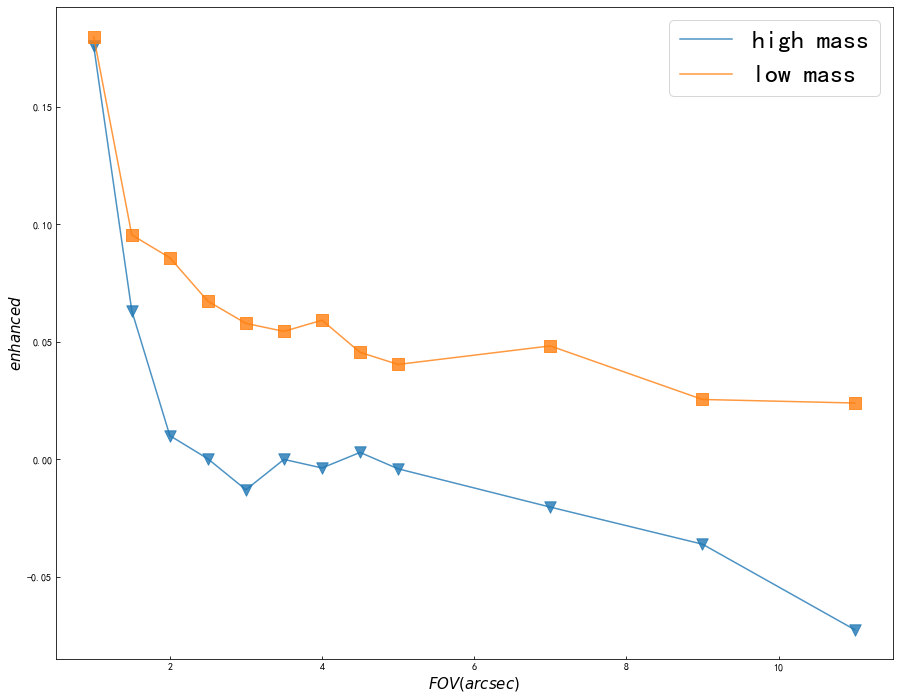

In [535]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True)
# figsize=(23, 12)
fig,ax=plt.subplots(nrows=1, ncols=1,sharex=True)
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['savefig.dpi']=400
x=[1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11]
a=4
##################################################################################################
'''
ax1=ax[0]

ax1.errorbar(x=x,y=E,fmt='-',label='all',elinewidth=2,capsize=3,alpha=0.8)
# ax2.yaxis('log')

ax1.legend(prop={'size': 26})
ax1.set_xlabel(r"$FOV(arcsec)$",fontsize=13)
ax1.set_ylabel(r"$E$",fontsize=15)
'''
######################################################################################################
'''
ax2.errorbar(x=x,y=E_mass_1,yerr=[E_mass_1_min,E_mass_1_max],fmt='o',label='high mass',elinewidth=2,capsize=3,alpha=0.8)
ax2.errorbar(x=x,y=E_mass_2,yerr=[E_mass_2_min,E_mass_2_max],fmt='o',label='medium mass',elinewidth=2,capsize=3,alpha=0.8)
ax2.errorbar(x=x,y=E_mass_3,yerr=[E_mass_3_min,E_mass_3_max],fmt='o',label='low mass',elinewidth=2,capsize=3,alpha=0.8)
'''

# ax.errorbar(x=x,y=E,fmt='-',label='all',elinewidth=5,capsize=3,alpha=0.8)
# ax2.errorbar(x=x,y=(np.array(E_mass_1)+np.array(E_mass_2))/2,fmt='-',label='high mass',elinewidth=3,capsize=3,alpha=0.8)
ax.errorbar(x=x,y=E_mass_2,fmt='-',label='high mass',elinewidth=8,capsize=3,alpha=0.8)
ax.errorbar(x=x,y=E_mass_3,fmt='-',label='low mass',elinewidth=8,capsize=3,alpha=0.8)

ax.scatter(x=x,y=E_mass_2,marker='v',s=130,alpha=0.8)
ax.scatter(x=x,y=E_mass_3,marker='s',s=130,alpha=0.8)
# ax2.yaxis('log')
ax.legend()
#ax2.set_title("$11.8 \geq \lg M_*/M \geq 9.83$")
ax.set_xlabel(r"$FOV(arcsec)$",fontsize=15)
ax.set_ylabel(r"$enhanced$",fontsize=15)
ax.legend(prop={'size': 26})
#ax2.set_title("$9.9 \geq \lg M_*/M \geq 9.4$")
#plt.suptitle("一张画布两个子图,并共享y坐标")

######################################################################################################

fig.subplots_adjust(wspace=0)
plt.savefig('C.png',dpi=500)
plt.show()

#### 不同r下的近邻数量

In [78]:
# FOV_1
stastic

,0,1,2,3,4,5,6,7,8,9,...,23503,23504,23505,23506,23507,23508,23509,23510,23511,23512
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
5,0.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
6,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
7,0.0,4.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
8,0.0,4.0,0.0,2.0,2.0,2.0,3.0,1.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,1.0,5.0,0.0,2.0,2.0,4.0,3.0,1.0,2.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0
10,1.0,7.0,1.0,2.0,6.0,4.0,6.0,2.0,3.0,1.0,...,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0


In [40]:
data_nei_count=data_all
tem=stastic.iloc[1:,:]

In [41]:
data_nei_count.columns

Index(['ra', 'dec', 'id', 'x_image', 'y_image', 'flux_814w', 'fluxerr_814w',
       'type', 'zpdf', 'zpdf_l68', 'zpdf_h68', 'zminchi2', 'age', 'class',
       'mass_med_min68', 'mass_med_max68', 'mass_best', 'sfr_med_min68',
       'sfr_med_max68', 'sfr_best', 'ssfr_med_min68', 'ssfr_med_max68',
       'ssfr_best', 'merger', 'desity_1', 'desity_1.5', 'desity_2',
       'desity_2.5', 'desity_3', 'desity_3.5', 'desity_4', 'desity_4.5',
       'desity_5', 'desity_7', 'desity_9', 'desity_11', 'ind'],
      dtype='object')

In [49]:
x[0]

1

In [52]:
for i,j in enumerate(x[1:]):
    data_nei_count[str(j)]=np.array(tem.iloc[i,:])

In [248]:
l=['1', '1.5', '2','2.5', '3', '3.5', '4', '4.5', '5', '7', '9', '11']

data_nei_count_by_mag=data_nei_count.sort_values('flux_814w')
tem=int(len(data_nei_count_by_mag)/3)
data_nei_count_by_mag_1=data_nei_count_by_mag.iloc[0:tem,:]
data_nei_count_by_mag_2=data_nei_count_by_mag.iloc[tem:2*tem,:]
data_nei_count_by_mag_3=data_nei_count_by_mag.iloc[2*tem:3*tem,:]


data_nei_count_by_mag_1_ssfr=data_nei_count_by_mag_1.sort_values('ssfr_best')
tem=int(len(data_nei_count_by_mag_1_ssfr)/4)
data_nei_count_by_mag_1_ssfr_1=data_nei_count_by_mag_1_ssfr.iloc[0:tem,:]
data_nei_count_by_mag_1_ssfr_2=data_nei_count_by_mag_1_ssfr.iloc[tem:2*tem,:]
data_nei_count_by_mag_1_ssfr_3=data_nei_count_by_mag_1_ssfr.iloc[2*tem:3*tem,:]
data_nei_count_by_mag_1_ssfr_4=data_nei_count_by_mag_1_ssfr.iloc[3*tem:4*tem,:]
Array_data_nei_count_by_mag_1=np.zeros((4,len(l)))
for i,ii in enumerate([data_nei_count_by_mag_1_ssfr_1,data_nei_count_by_mag_1_ssfr_2,data_nei_count_by_mag_1_ssfr_3,data_nei_count_by_mag_1_ssfr_4]):
    for j,k in  enumerate(l):
        Array_data_nei_count_by_mag_1[i,j]=np.mean(ii[k])


data_nei_count_by_mag_2_ssfr=data_nei_count_by_mag_2.sort_values('ssfr_best')
tem=int(len(data_nei_count_by_mag_2_ssfr)/4)
data_nei_count_by_mag_2_ssfr_1=data_nei_count_by_mag_2_ssfr.iloc[0:tem,:]
data_nei_count_by_mag_2_ssfr_2=data_nei_count_by_mag_2_ssfr.iloc[tem:2*tem,:]
data_nei_count_by_mag_2_ssfr_3=data_nei_count_by_mag_2_ssfr.iloc[2*tem:3*tem,:]
data_nei_count_by_mag_2_ssfr_4=data_nei_count_by_mag_2_ssfr.iloc[3*tem:4*tem,:]
Array_data_nei_count_by_mag_2=np.zeros((4,len(l)))
for i,ii in enumerate([data_nei_count_by_mag_2_ssfr_1,data_nei_count_by_mag_2_ssfr_2,data_nei_count_by_mag_2_ssfr_3,data_nei_count_by_mag_2_ssfr_4]):
    for j,k in  enumerate(l):
        Array_data_nei_count_by_mag_2[i,j]=np.mean(ii[k])

data_nei_count_by_mag_3_ssfr=data_nei_count_by_mag_3.sort_values('ssfr_best')
tem=int(len(data_nei_count_by_mag_3_ssfr)/4)
data_nei_count_by_mag_3_ssfr_1=data_nei_count_by_mag_3_ssfr.iloc[0:tem,:]
data_nei_count_by_mag_3_ssfr_2=data_nei_count_by_mag_3_ssfr.iloc[tem:2*tem,:]
data_nei_count_by_mag_3_ssfr_3=data_nei_count_by_mag_3_ssfr.iloc[2*tem:3*tem,:]
data_nei_count_by_mag_3_ssfr_4=data_nei_count_by_mag_3_ssfr.iloc[3*tem:4*tem,:]
Array_data_nei_count_by_mag_3=np.zeros((4,len(l)))
for i,ii in enumerate([data_nei_count_by_mag_3_ssfr_1,data_nei_count_by_mag_3_ssfr_2,data_nei_count_by_mag_3_ssfr_3,data_nei_count_by_mag_3_ssfr_4]):
    for j,k in  enumerate(l):
        Array_data_nei_count_by_mag_3[i,j]=np.mean(ii[k])

'''
Array_data_nei_count_by_mag_1[0,:]+=0.04
Array_data_nei_count_by_mag_1[3,:]-=0.04
Array_data_nei_count_by_mag_2[0,:]+=0.08
Array_data_nei_count_by_mag_2[3,:]-=0.08
'''
Array_data_nei_count_by_mag_3[0,:]+=0.08
Array_data_nei_count_by_mag_3[3,:]-=0.04


In [249]:
Array_data_nei_count_by_mag_1

array([[0.05768249, 0.05768249, 0.15160796, 0.28279735, 0.45482389,
        0.67023992, 0.92343032, 1.18683002, 1.46197039, 2.93159775,
        4.39816233, 5.6202144 ],
       [0.04236856, 0.04236856, 0.1265952 , 0.24757529, 0.40224604,
        0.58090863, 0.80704441, 1.06533946, 1.35528331, 2.71311894,
        4.06687085, 5.27105666],
       [0.05155692, 0.05155692, 0.14497192, 0.27309852, 0.42827973,
        0.63297601, 0.86217458, 1.11842777, 1.39816233, 2.7697805 ,
        4.12353241, 5.32924962],
       [0.06636039, 0.06636039, 0.16998469, 0.29913221, 0.46554364,
        0.66156202, 0.88259316, 1.12251149, 1.42113323, 2.8085758 ,
        4.08065339, 5.24808576]])

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


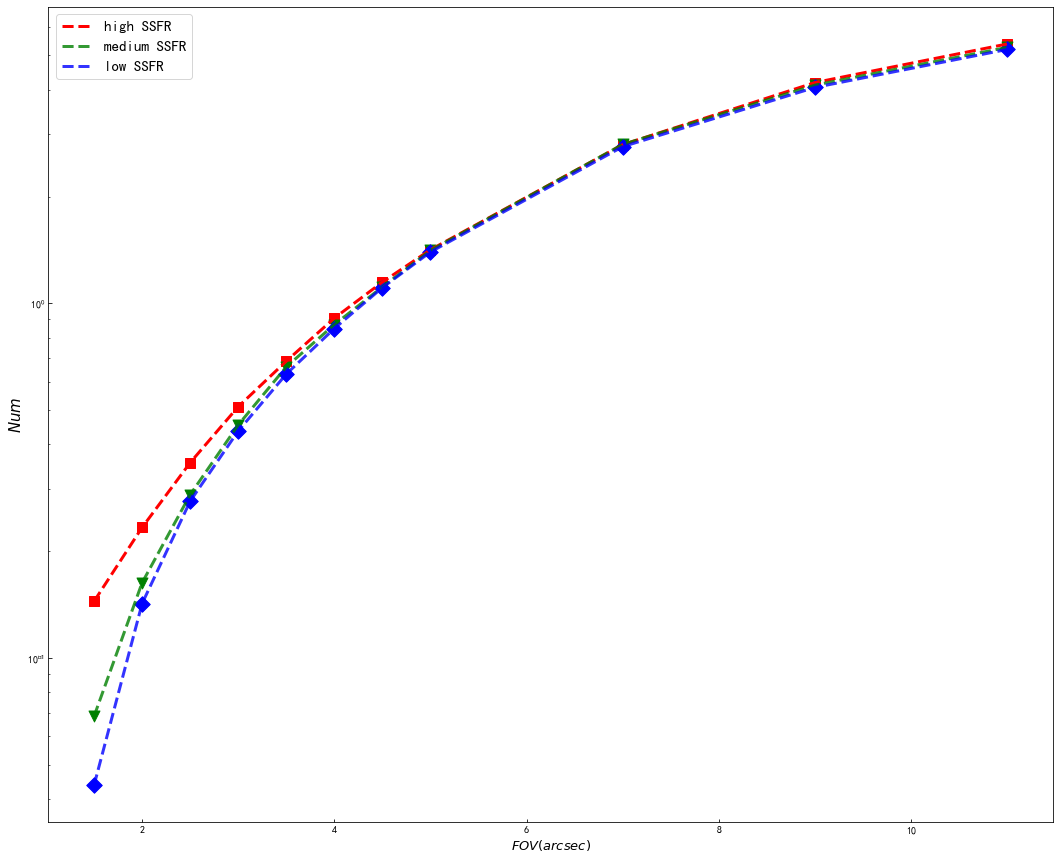

In [532]:
# sample_average_mass_1,sample_average_mass_2,sample_average_mass_3,sample_average_mass_4
# sample_average_merger_mass
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True)
fig,ax=plt.subplots(nrows=1, ncols=1,sharex=True)
plt.yscale('log')
plt.rcParams['figure.figsize'] = [18, 15]
plt.rcParams['savefig.dpi']=500

x=[1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11]
##################################################################################################
plt.plot(x[1:],Array_data_nei_count_by_mag_3[0,:][1:],linestyle='--',label='high SSFR',c='r',linewidth=3,alpha=1)
plt.plot(x[1:],Array_data_nei_count_by_mag_3[1,:][1:],linestyle='--',label='medium SSFR',c='g',linewidth=3,alpha=0.8)
plt.plot(x[1:],Array_data_nei_count_by_mag_3[3,:][1:],linestyle='--',label='low SSFR',c='b',linewidth=3,alpha=0.8)

plt.scatter(x[1:],Array_data_nei_count_by_mag_3[0,:][1:],marker='s',c='r',alpha=1,s=120)
plt.scatter(x[1:],Array_data_nei_count_by_mag_3[1,:][1:],marker='v',c='g',alpha=1,s=120)
plt.scatter(x[1:],Array_data_nei_count_by_mag_3[3,:][1:],marker='D',c='b',alpha=1,s=120)


ax.legend(prop={'size': 15})
ax.set_xlabel(r"$FOV(arcsec)$",fontsize=13)
ax.set_ylabel(r"$Num$",fontsize=15)

plt.yscale('log')
fig.subplots_adjust(wspace=0)
plt.savefig('A.png')
plt.show()

In [314]:
top_60_ssfr=data_stacked_sorted_by_ssfr.iloc[0:60,:]
count_top_60_ssfr=top_60_ssfr['merger'].value_counts(normalize=True)

bottom_60_ssfr=data_stacked_sorted_by_ssfr.iloc[-60:,:]
count_bottom_60_ssfr=bottom_60_ssfr['merger'].value_counts(normalize=True)


In [325]:
bottom_60_ssfr[['ra','dec']].to_csv('D:/COSMOS 2015 cataloge/003/bottom_100_ssfr.csv',index=False)
top_60_ssfr[['ra','dec']].to_csv('D:/COSMOS 2015 cataloge/003/top_100_ssfr.csv',index=False)

In [323]:
data_stacked_sorted_by_sfr=data_stacked.sort_values('sfr_best',ascending=False)
top_100_sfr = data_stacked_sorted_by_sfr.iloc[0:100, :]
count_top_100_sfr = top_100_sfr['merger'].value_counts(normalize=True)

bottom_100_sfr = data_stacked_sorted_by_sfr.iloc[-100:, :]
count_bottom_100_sfr = bottom_100_sfr['merger'].value_counts(normalize=True)

count_top_100_sfr

0    0.9
1    0.1
Name: merger, dtype: float64

In [324]:
count_bottom_100_sfr

0    0.92
1    0.08
Name: merger, dtype: float64

#### top ssfr/sfr 的星系中，没有近邻的

In [394]:
data_nei_count_sort_values=data_nei_count.sort_values('ssfr_best',ascending=False)

In [449]:
isolate_5=data_nei_count_sort_values[data_nei_count_sort_values['5']==0]

isolate_5_top_60_ssfr=isolate_5.iloc[0:60,:]
count_isolate_5_top_60_ssfr=isolate_5_top_60_ssfr['merger'].value_counts(normalize=True)

isolate_5_bottom_60_ssfr=isolate_5.iloc[-60:,:]
count_isolate_5_bottom_60_ssfr=isolate_5_bottom_60_ssfr['merger'].value_counts(normalize=True)

In [450]:
count_isolate_5_top_60_ssfr

0    0.85
1    0.15
Name: merger, dtype: float64

In [451]:
count_isolate_5_bottom_60_ssfr

0    0.966667
1    0.033333
Name: merger, dtype: float64

In [447]:
'''对于无近邻星系，bottom 60的星系与top60的星系相比，merger的比例提高了4.5倍.'''

In [454]:
# isolate_5_top_60_ssfr[['ra','dec']].to_csv('D:/COSMOS 2015 cataloge/003/top_60_ssfr.csv',index=False)
# isolate_5_bottom_60_ssfr[['ra','dec']].to_csv('D:/COSMOS 2015 cataloge/003/bottom_60_ssfr.csv',index=False)

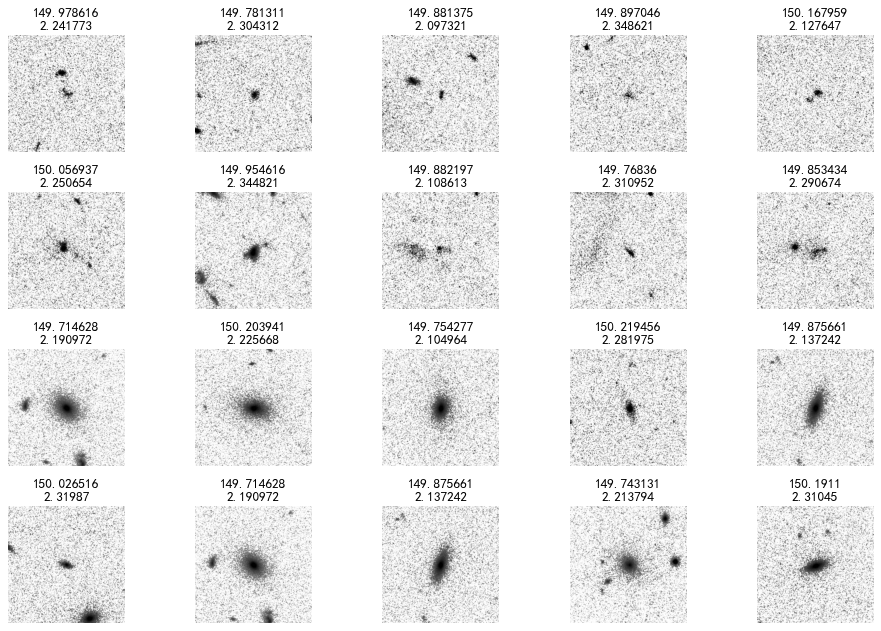

In [561]:
fig = plt.figure(figsize=(12,8),dpi=80)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
for i in range(1,21):
    if i <11:
        top = os.listdir('D:/COSMOS 2015 cataloge/003/top/')
        ax=fig.add_subplot(4,5,i)
        lo=top[np.random.randint(1,len(top))]
        img_path_top ='D:/COSMOS 2015 cataloge/003/top/'
        image=plt.imread(img_path_top+lo)
        ax.imshow(image,cmap='plasma')
        s=lo.split('_',)
        ax.set_title('{}\n{}'.format(s[1],s[2]))
        ax.axis('off')
        # plt.tight_layout()

    else:
        bottom = os.listdir('D:/COSMOS 2015 cataloge/003/bottom/')
        ax=fig.add_subplot(4,5,i)
        lo=bottom[np.random.randint(1,len(bottom))]
        img_path_bottom='D:/COSMOS 2015 cataloge/003/bottom/'
        image=plt.imread(img_path_bottom+lo)
        ax.imshow(image,cmap='plasma')
        s=lo.split('_',)
        ax.set_title('{}\n{}'.format(s[1],s[2]))
        ax.axis('off')
plt.tight_layout()
#plt.savefig('im.png',dpi=300)
plt.subplots_adjust(wspace=0)
plt.show()